In [ ]:
#استيراد المكتبات الأساسية
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
#ﺗﺤﻤﯿﻞ اﻟﺪاﺗﺎ ﺳﯿﺖ ﻣﻦ ﻛﺎﻗﻞ
!pip install -q kaggle
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving archive.zip to archive (2).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d akshat103/e-waste-image-dataset
# بعد تنزيل ملف zip، نفك الضغط
!unzip -q e-waste-image-dataset.zip -d /content/e_waste_data
# نشوف الملفات داخل المجلد
!ls /content/e_waste_data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open e-waste-image-dataset.zip, e-waste-image-dataset.zip.zip or e-waste-image-dataset.zip.ZIP.
ls: cannot access '/content/e_waste_data': No such file or directory


In [ ]:
#Definition of a function to calculate the number of images per category
#تعريف دالة لحساب عدد الصور لكل فئة

def get_counts(folder):
    counts = {}
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            counts[class_folder] = len(os.listdir(class_path))
    return counts

In [ ]:
#Counting Images in Each Class
#هنا نحدد مسارات Train / Test / Validation
#ونعد الصور لكل مجموعة

train_folder = "/content/e_waste_data/modified-dataset/train"
test_folder  = "/content/e_waste_data/modified-dataset/test"
val_folder   = "/content/e_waste_data/modified-dataset/val"

train_counts = get_counts(train_folder)
test_counts = get_counts(test_folder)
val_counts = get_counts(val_folder)

print("Train:", train_counts)
print("Test:", test_counts)
print("Val:", val_counts)

Train: {'Mobile': 240, 'PCB': 240, 'Keyboard': 240, 'Washing Machine': 240, 'Printer': 240, 'Battery': 240, 'Player': 240, 'Mouse': 240, 'Television': 240, 'Microwave': 240}
Test: {'Mobile': 30, 'PCB': 30, 'Keyboard': 30, 'Washing Machine': 30, 'Printer': 30, 'Battery': 30, 'Player': 30, 'Mouse': 30, 'Television': 30, 'Microwave': 30}
Val: {'Mobile': 30, 'PCB': 30, 'Keyboard': 30, 'Washing Machine': 30, 'Printer': 30, 'Battery': 30, 'Player': 30, 'Mouse': 30, 'Television': 30, 'Microwave': 30}


### Uploading `kaggle.json` for Authentication

To download datasets from Kaggle, you need to authenticate using an API token. Follow these steps to get your `kaggle.json` file:

1. Go to [Kaggle](https://www.kaggle.com/).
2. Log in to your account.
3. Click on your profile picture in the top right corner and select "My Account".
4. Scroll down to the "API" section and click "Create New API Token". This will download a `kaggle.json` file.

Once you have the `kaggle.json` file, run the following code cell. It will prompt you to upload the `kaggle.json` file from your local machine. Please ensure you upload the correct file.


In [ ]:
# Install Kaggle API client
!pip install -q kaggle

from google.colab import files

# Prompt the user to upload kaggle.json
print("Please upload your 'kaggle.json' file:")
uploaded = files.upload()

# Ensure kaggle.json is in the correct location and has the right permissions
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the Kaggle directory
# Assuming the file is uploaded to the current content directory
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key configured successfully.")

Please upload your 'kaggle.json' file:


Saving archive.zip to archive (1).zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API key configured successfully.


Now that Kaggle is configured, we can retry downloading and extracting the dataset.

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d akshat103/e-waste-image-dataset

# After downloading the zip file, extract its contents
# Use -q for quiet mode (no verbose output during extraction)
# Use -d to specify the destination directory
!unzip -q e-waste-image-dataset.zip -d /content/e_waste_data

# List the files inside the extracted folder to verify
!ls /content/e_waste_data
!ls /content/e_waste_data/modified-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open e-waste-image-dataset.zip, e-waste-image-dataset.zip.zip or e-waste-image-dataset.zip.ZIP.
ls: cannot access '/content/e_waste_data': No such file or directory
ls: cannot access '/content/e_waste_data/modified-dataset': No such file or directory


In [ ]:
#Creating DataFrames for Image Counts
#تحويل القوائم إلى جداول لسهولة التعامل معها

df_train = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train Count'])
df_test = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test Count'])
df_val = pd.DataFrame(list(val_counts.items()), columns=['Class', 'Validation Count'])

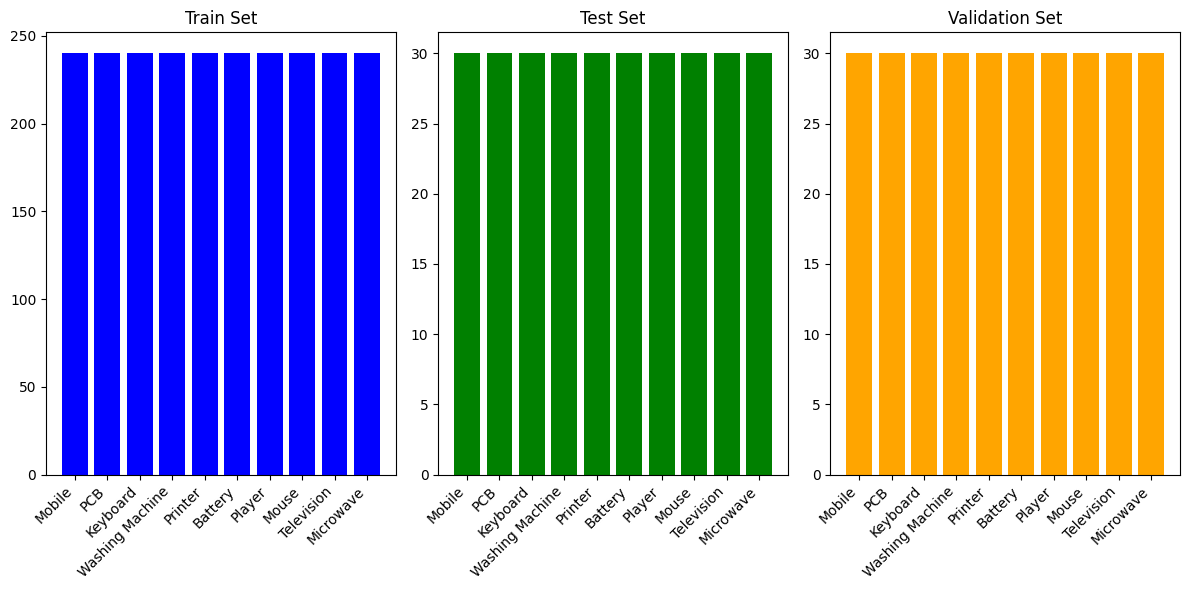

In [ ]:
#Plotting the Class Distribution
# نرسم عشان نعرف توزيع الصور ونتأكد انها موزعة بشكل متوازن ونعرف وش الفئات الناقصة

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(df_train['Class'], df_train['Train Count'], color='blue')
plt.title('Train Set')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 3, 2)
plt.bar(df_test['Class'], df_test['Test Count'], color='green')
plt.title('Test Set')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 3, 3)
plt.bar(df_val['Class'], df_val['Validation Count'], color='orange')
plt.title('Validation Set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Paths & hyperparams
train_folder = "/content/e_waste_data/modified-dataset/train"
val_folder   = "/content/e_waste_data/modified-dataset/val"
test_folder  = "/content/e_waste_data/modified-dataset/test"

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_EPOCHS = 25
SEED = 42

In [ ]:
#4) Data generators (with augmentation)
#Rescale: تحويل قيم البكسل إلى 0-1
#Augmentation: تدوير، تحريك، تكبير/تصغير، قلب أفقي → يزيد تنوع البيانات

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

#توليد بيانات Train و Validation بشكل تلقائي
# يقرأ الصور من المجلدات ويجهزها للنموذج

# Validation generator بدون augmentations
val_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_gen = train_datagen.flow_from_directory(
    train_folder,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
val_gen = val_datagen.flow_from_directory(
    val_folder,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_datagen.flow_from_directory(
    test_folder,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [ ]:
# 5) Build hybred model

base_mobilenet = MobileNetV2(include_top=False, weights='imagenet',
                             input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                             pooling=None)

base_efficient = EfficientNetB0(include_top=False, weights='imagenet',
                                input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                pooling=None)

base_mobilenet.trainable = False
base_efficient.trainable = False

inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# استخراج ميزات من النموذجين
feat1 = base_mobilenet(inputs)
feat2 = base_efficient(inputs)

# دمج الميزات — (feature fusion)
merged = layers.Concatenate()([feat1, feat2])


flat = layers.Flatten()(merged)

dense = layers.Dense(256, activation='relu')(flat)
drop = layers.Dropout(0.5)(dense)

outputs = layers.Dense(train_gen.num_classes, activation='softmax')(drop)

model = models.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ input_layer_2[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_2[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 7, 7,      │          0 │ mobilenetv2_1.00… │
│ (Concatenate)       │ 2560)             │            │ efficientnetb0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 125440)    │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │ 32,112,896 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,423,021 (146.57 MB)

 Trainable params: 32,115,466 (122.51 MB)

 Non-trainable params: 6,307,555 (24.06 MB)

In [ ]:
# Train
# استخدم مجموعة التدريب عشان يدرب النموذج
#تقييم الأداء بعد كل Epoch على Validation Set

callbacks = [
    ModelCheckpoint("/content/ewaste_hybrid_best.h5", save_best_only=True,
                    monitor='val_accuracy', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)
]

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4383 - loss: 2.5403
Epoch 1: val_accuracy improved from -inf to 0.88000, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 416s 5s/step - accuracy: 0.4405 - loss: 2.5262 - val_accuracy: 0.8800 - val_loss: 0.3544 - learning_rate: 1.0000e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8160 - loss: 0.6012
Epoch 2: val_accuracy improved from 0.88000 to 0.91333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.8160 - loss: 0.6009 - val_accuracy: 0.9133 - val_loss: 0.2694 - learning_rate: 1.0000e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8551 - loss: 0.4451
Epoch 3: val_accuracy improved from 0.91333 to 0.92000, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 378s 5s/step - accuracy: 0.8550 - loss: 0.4455 - val_accuracy: 0.9200 - val_loss: 0.2346 - learning_rate: 1.0000e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8577 - loss: 0.4333
Epoch 4: val_accuracy improved from 0.92000 to 0.92333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 389s 5s/step - accuracy: 0.8577 - loss: 0.4335 - val_accuracy: 0.9233 - val_loss: 0.2128 - learning_rate: 1.0000e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8821 - loss: 0.3667
Epoch 5: val_accuracy improved from 0.92333 to 0.93333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.8821 - loss: 0.3667 - val_accuracy: 0.9333 - val_loss: 0.1904 - learning_rate: 1.0000e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8883 - loss: 0.3370
Epoch 6: val_accuracy did not improve from 0.93333
75/75 ━━━━━━━━━━━━━━━━━━━━ 369s 5s/step - accuracy: 0.8883 - loss: 0.3370 - val_accuracy: 0.9300 - val_loss: 0.2323 - learning_rate: 1.0000e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9002 - loss: 0.3019
Epoch 7: val_accuracy improved from 0.93333 to 0.94333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 395s 5s/step - accuracy: 0.9002 - loss: 0.3016 - val_accuracy: 0.9433 - val_loss: 0.1867 - learning_rate: 1.0000e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9079 - loss: 0.2931
Epoch 8: val_accuracy did not improve from 0.94333
75/75 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.9080 - loss: 0.2928 - val_accuracy: 0.9433 - val_loss: 0.2211 - learning_rate: 1.0000e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9073 - loss: 0.2649
Epoch 9: val_accuracy did not improve from 0.94333
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.9072 - loss: 0.2653 - val_accuracy: 0.9433 - val_loss: 0.1664 - learning_rate: 1.0000e-04
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9159 - loss: 0.2554
Epoch 10: val_accuracy improved from 0.94333 to 0.95333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 417s 6s/step - accuracy: 0.9159 - loss: 0.2554 - val_accuracy: 0.9533 - val_loss: 0.1623 - learning_rate: 1.0000e-04
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9093 - loss: 0.3006
Epoch 11: val_accuracy did not improve from 0.95333
75/75 ━━━━━━━━━━━━━━━━━━━━ 369s 5s/step - accuracy: 0.9093 - loss: 0.3004 - val_accuracy: 0.9433 - val_loss: 0.1805 - learning_rate: 1.0000e-04
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9169 - loss: 0.2501
Epoch 12: val_accuracy improved from 0.95333 to 0.95667, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 392s 5s/step - accuracy: 0.9168 - loss: 0.2502 - val_accuracy: 0.9567 - val_loss: 0.1603 - learning_rate: 1.0000e-04
Epoch 13/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9302 - loss: 0.2100
Epoch 13: val_accuracy did not improve from 0.95667
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.9302 - loss: 0.2100 - val_accuracy: 0.9467 - val_loss: 0.1872 - learning_rate: 1.0000e-04
Epoch 14/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9211 - loss: 0.2157
Epoch 14: val_accuracy did not improve from 0.95667
75/75 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.9212 - loss: 0.2158 - val_accuracy: 0.9500 - val_loss: 0.1843 - learning_rate: 1.0000e-04
Epoch 15/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9420 - loss: 0.1811
Epoch 15: val_accuracy improved from 0.95667 to 0.96333, saving model to /content/ewaste_hybrid_best.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 392s 5s/step - accuracy: 0.9418 - loss: 0.1815 - val_accuracy: 0.9633 - val_loss: 0.1388 - learning_rate: 1.0000e-04
Epoch 16/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9234 - loss: 0.2259
Epoch 16: val_accuracy did not improve from 0.96333
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.9234 - loss: 0.2259 - val_accuracy: 0.9533 - val_loss: 0.1559 - learning_rate: 1.0000e-04
Epoch 17/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9334 - loss: 0.2101
Epoch 17: val_accuracy did not improve from 0.96333
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.9334 - loss: 0.2101 - val_accuracy: 0.9533 - val_loss: 0.1620 - learning_rate: 1.0000e-04
Epoch 18/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9321 - loss: 0.2024
Epoch 18: val_accuracy did not improve from 0.96333
75/75 ━━━━━━━━━━━━━━━━━━━━ 384s 5s/step - accuracy: 0.9321 - loss: 0.2025 - val_accuracy: 0.9467 - val_loss: 0.1773 - learning_rate: 1.0000e-04
Epoch 19/20
75/7

75/75 ━━━━━━━━━━━━━━━━━━━━ 395s 5s/step - accuracy: 0.9417 - loss: 0.1763 - val_accuracy: 0.9667 - val_loss: 0.1375 - learning_rate: 5.0000e-05
Epoch 20/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9603 - loss: 0.1110
Epoch 20: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.9602 - loss: 0.1113 - val_accuracy: 0.9600 - val_loss: 0.1458 - learning_rate: 5.0000e-05


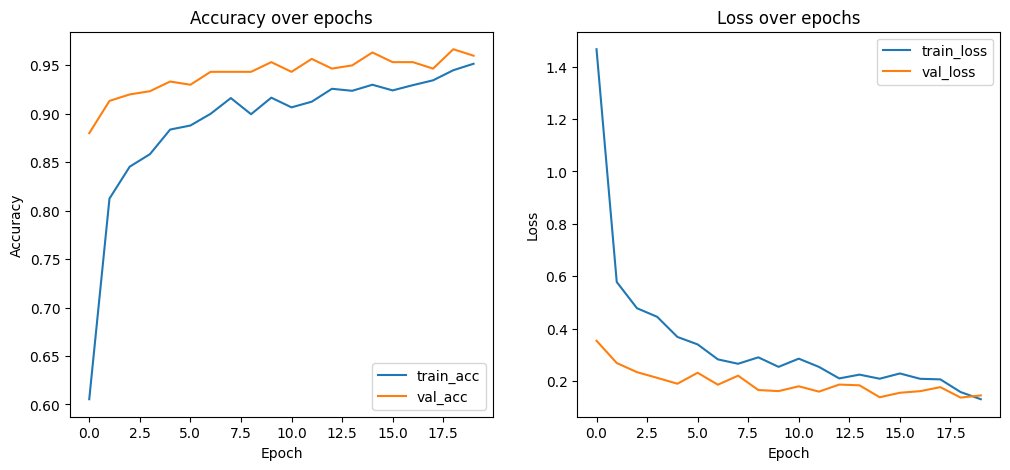

In [ ]:
#Plot training curves

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

# Fine-tune
# يفتح اخر 50 طبقة من النموذج الأساسي ويسوي لها تدريب دقيق عشان يحسن الاداء على الداتا سيت الجديدة
#لأن آخر طبقات الشبكة تحتوي على الميزات الأكثر تخصصًا ف بدل لا يدرب كل الشبكة يدرب بس اخر 50
base_mobilenet.trainable = True
base_efficient.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#الآن يبدأ تدريب جديد لمدة 10 epochs على
#train_gen (بيانات التدريب)
# val_gen (بيانات التحقق)
# باستخدام callbacks مثل EarlyStopping و ModelCheckpoint

fine_history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=callbacks
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.6170 - loss: 2.0231 
Epoch 1: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━━━━━━━━━ 1350s 17s/step - accuracy: 0.6180 - loss: 2.0148 - val_accuracy: 0.9533 - val_loss: 0.1833 - learning_rate: 1.0000e-05
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.7981 - loss: 0.7651 
Epoch 2: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━━━━━━━━━ 1238s 16s/step - accuracy: 0.7982 - loss: 0.7641 - val_accuracy: 0.9400 - val_loss: 0.2151 - learning_rate: 1.0000e-05
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8445 - loss: 0.5230 
Epoch 3: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━━━━━━━━━ 1240s 17s/step - accuracy: 0.8445 - loss: 0.5231 - val_accuracy: 0.9367 - val_loss: 0.2328 - learning_rate: 1.0000e-05
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8713 - loss: 0.4343 
Epoch 4: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━

In [ ]:
# Evaluate
#حساب الدقة والخسارة على بيانات التحقق

test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)

test_gen.reset()
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

model.save("/content/ewaste_hybrid_final.h5")
print("Saved final model.")

10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9313 - loss: 0.2047
Test Accuracy: 0.9399999976158142
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step



Classification Report:

                 precision    recall  f1-score   support

        Battery       0.84      0.87      0.85        30
       Keyboard       0.97      0.97      0.97        30
      Microwave       0.83      1.00      0.91        30
         Mobile       1.00      0.97      0.98        30
          Mouse       1.00      0.93      0.97        30
            PCB       1.00      0.87      0.93        30
         Player       0.96      0.90      0.93        30
        Printer       0.91      1.00      0.95        30
     Television       0.96      0.90      0.93        30
Washing Machine       0.97      1.00      0.98        30

       accuracy                           0.94       300
      macro avg       0.94      0.94      0.94       300
   weighted avg       0.94      0.94      0.94       300


Confusion Matrix:

[[26  1  1  0  0  0  0  1  0  1]
 [ 1 29  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  1  0]
 [ 1  0  0  0 28  0  0

In [ ]:
#Save class indices
# يعطي كل كلاس رقم تنبؤي ويسوي معجم للارقام ويحفظه في ملف json في مجلد كونتنت
import json

with open('/content/class_indices.json', 'w') as f:
    json.dump(val_gen.class_indices, f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


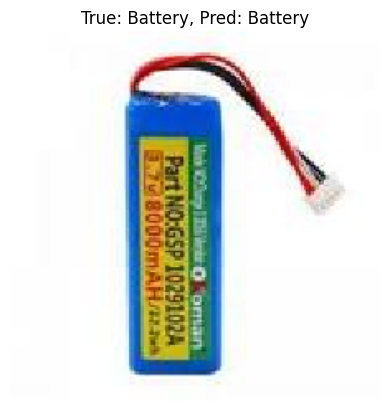

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


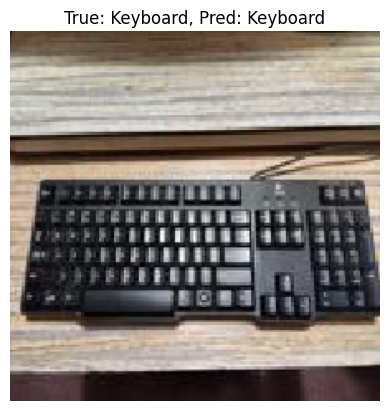

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


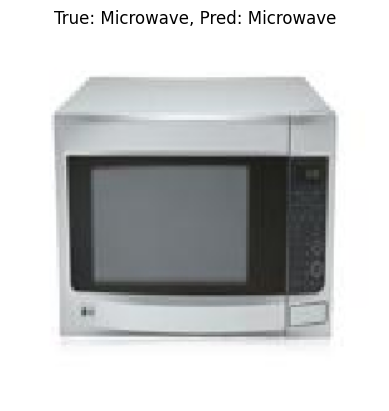

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


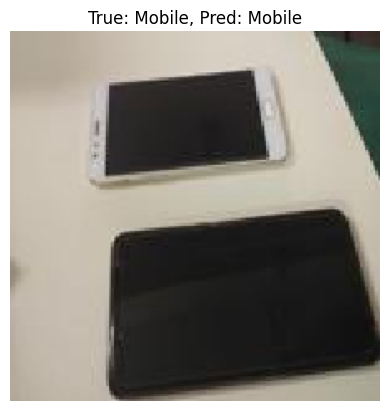

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


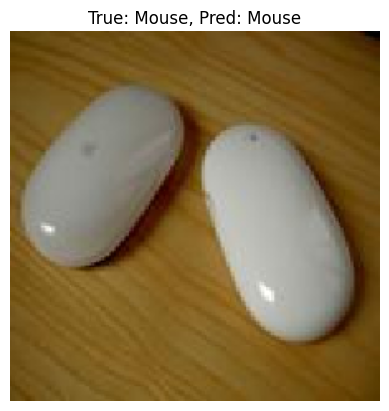

In [ ]:
#Show sample predictions (Bonus)
#يعطيك توضيح بصري مباشر لأداء النموذج على الصور الحقيقية، ويخليك تشوفين الأخطاء بسهولة.

labels = list(val_gen.class_indices.keys())

for i in range(5):
    img, label = val_gen[i]
    pred_probs = model.predict(img)
    pred_class = np.argmax(pred_probs, axis=1)
    true_class = np.argmax(label, axis=1)

    plt.imshow(img[0])
    plt.title(f"True: {labels[true_class[0]]}, Pred: {labels[pred_class[0]]}")
    plt.axis('off')
    plt.show()

In [ ]:
#Function to predict new image (Bonus)
#دالة لتجربة النموذج على أي صورة جديدة خارج dataset

from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, labels):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred_probs = model.predict(img_array)
    pred_class = np.argmax(pred_probs)
    print(f"Predicted class: {labels[pred_class]}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# Save final model

model.save('/content/ewaste_model_final.h5')
print("Saved model to /content/ewaste_model_final.h5")

Saved model to /content/ewaste_model_final.h5


# **Quantized** **Model**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [ ]:
# --- 1. إعداد المسارات والمتغيرات بناءً على الوثيقة المرفقة ---
# يجب أن يكون الملف ewaste_hybrid_final.h5 موجودًا في هذا المسار
MODEL_PATH = '/content/ewaste_hybrid_final.h5'
QUANTIZED_MODEL_PATH = '/content/ewaste_hybrid_quantized.tflite'
TEST_FOLDER = "/content/e_waste_data/modified-dataset/test" #
IMG_HEIGHT = 224 #
IMG_WIDTH = 224 #
BATCH_SIZE = 32 #

# إعادة إنشاء مُنشئ بيانات الاختبار (Test Generator)

val_datagen = ImageDataGenerator(rescale=1./255)
test_gen = val_datagen.flow_from_directory(
    TEST_FOLDER,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 300 images belonging to 10 classes.


In [ ]:
# --- 2. ضغط (Quantization) النموذج باستخدام TensorFlow Lite ---
print("--- بدء عملية ضغط النموذج (Quantization) ---")

try:
    # 1. تحميل النموذج الأصلي
    keras_model = load_model(MODEL_PATH)

    # 2. إنشاء محوّل TensorFlow Lite
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)

    # 3. تطبيق تقنية Dynamic Range Quantization (ضغط المدى الديناميكي)
    # هذه التقنية تقلل حجم النموذج وتسرع الاستدلال مع الحد الأدنى من فقدان الدقة.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # 4. تحويل النموذج
    tflite_model = converter.convert()

    # 5. حفظ النموذج المضغوط
    with open(QUANTIZED_MODEL_PATH, 'wb') as f:
        f.write(tflite_model)

    print(f"تم حفظ النموذج المضغوط في: {QUANTIZED_MODEL_PATH}")

except Exception as e:
    print(f"حدث خطأ أثناء الضغط أو التحميل: {e}")
    # إذا فشل التحميل أو الضغط، لا يمكن الاستمرار في المقارنة
    exit()

--- بدء عملية ضغط النموذج (Quantization) ---


Saved artifact at '/tmp/tmp2gpi6t9j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137642308596368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749536336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749536144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749534032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749529040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749533840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749537104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749535952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749534416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749534992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137641749533

In [ ]:
# --- 3. دالة للاستدلال على نموذج TFLite ---
def tflite_predict(tflite_model_path, data_generator):
    # تحميل المفسر (Interpreter)
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # جلب تفاصيل المدخلات والمخرجات
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    input_dtype = input_details[0]['dtype']
    input_index = input_details[0]['index']
    output_index = output_details[0]['index']

    # التحضير لجمع التنبؤات
    all_predictions = []

    # إعادة تعيين المُنشئ للبدء من جديد
    data_generator.reset()

    # --- قياس الزمن على صورة واحدة فقط ---
    # الحصول على دفعة واحدة من الصور
    X_batch_for_time, _ = next(data_generator)
    # أخذ الصورة الأولى من الدفعة وإعادة تشكيلها لتكون بحجم دفعة (1, ارتفاع, عرض, قنوات)
    single_image_for_time = X_batch_for_time[0:1].astype(np.float32)

    start_time_single_inference = time.time()
    # تهيئة المدخلات بالصورة الواحدة
    interpreter.set_tensor(input_index, single_image_for_time)
    # تنفيذ الاستدلال
    interpreter.invoke()
    _ = interpreter.get_tensor(output_index) # لا يهمنا الناتج هنا بقدر الوقت المستغرق
    end_time_single_inference = time.time()
    inference_time_ms_per_image = (end_time_single_inference - start_time_single_inference) * 1000

    # --- الاستدلال على كامل مجموعة الاختبار لحساب الدقة ---
    # إعادة تعيين المُنشئ للبدء من جديد من أول مجموعة البيانات
    data_generator.reset()
    num_batches = len(data_generator)
    true_labels_all = []
    predicted_labels_all = []

    for batch_idx in range(num_batches):
        X_batch, y_batch = next(data_generator)
        true_labels_all.extend(np.argmax(y_batch, axis=1))

        for i in range(X_batch.shape[0]): # التكرار على كل صورة داخل الدفعة
            # الحصول على صورة واحدة بحجم دفعة 1
            img_input = X_batch[i:i+1]

            # التحويل إلى نوع البيانات المناسب للمفسر
            if input_dtype == np.uint8:
                img_input = (img_input * 255).astype(np.uint8)
            else:
                img_input = img_input.astype(np.float32)

            interpreter.set_tensor(input_index, img_input)
            interpreter.invoke()
            output_data = interpreter.get_tensor(output_index)
            predicted_labels_all.append(np.argmax(output_data))

    accuracy = accuracy_score(true_labels_all, predicted_labels_all)

    return accuracy, inference_time_ms_per_image

In [ ]:
# --- 4. حساب المقاييس للنموذج الأصلي (Original Model) ---

print("--- حساب مقاييس النموذج الأصلي ---")

# 1. الحجم
original_size_mb = os.path.getsize(MODEL_PATH) / (1024 * 1024)

# 2. الدقة والزمن
start_time = time.time()
# الاستدلال على كامل مجموعة الاختبار
test_gen.reset()
y_pred_probs_orig = keras_model.predict(test_gen, steps=len(test_gen), verbose=0)
y_pred_orig = np.argmax(y_pred_probs_orig, axis=1)
original_accuracy = accuracy_score(test_gen.classes, y_pred_orig)
total_time_orig = time.time() - start_time
original_inference_time_ms = (total_time_orig / len(test_gen.classes)) * 1000

# 3. الطاقه المستهلكه

def measure_energy_for_keras(model, generator, samples=50):
    total_time = 0
    count = 0

    generator.reset()
    for x, y in generator:
        for i in range(len(x)):
            if count >= samples:
                break

            img = x[i:i+1]

            start = time.time()
            _ = model.predict(img, verbose=0)
            end = time.time()

            inference_ms = (end - start) * 1000
            total_time += inference_ms
            count += 1

        if count >= samples:
            break

    avg_time_ms = total_time / count
    energy_mJ = avg_time_ms  # Energy proxy (1W × time)
    return avg_time_ms, energy_mJ


--- حساب مقاييس النموذج الأصلي ---


In [ ]:
# --- 5. حساب المقاييس للنموذج المضغوط (Quantized Model) ---

print("--- حساب مقاييس النموذج المضغوط (TFLite) ---")

# 1. الحجم
quantized_size_mb = os.path.getsize(QUANTIZED_MODEL_PATH) / (1024 * 1024)

# 2. الدقة والزمن
quantized_accuracy, quantized_inference_time_ms = tflite_predict(QUANTIZED_MODEL_PATH, test_gen)

# 3. الطاقه المستهلكه
def measure_energy_for_tflite(tflite_path, generator, samples=50):
    interpreter = tf.lite.Interpreter(model_path=tflite_path)
    interpreter.allocate_tensors()

    input_idx = interpreter.get_input_details()[0]['index']
    output_idx = interpreter.get_output_details()[0]['index']

    total_time = 0
    count = 0

    generator.reset()
    for x, y in generator:
        for i in range(len(x)):
            if count >= samples:
                break

            img = x[i:i+1].astype("float32")

            start = time.time()
            interpreter.set_tensor(input_idx, img)
            interpreter.invoke()
            pred = interpreter.get_tensor(output_idx)
            end = time.time()

            inference_ms = (end - start) * 1000
            total_time += inference_ms
            count += 1

        if count >= samples:
            break

    avg_time_ms = total_time / count
    energy_mJ = avg_time_ms  # Energy proxy
    return avg_time_ms, energy_mJ



--- حساب مقاييس النموذج المضغوط (TFLite) ---


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
# --- Final Comparison Table: Accuracy + Time + Energy + Size ---

import pandas as pd
import os

# Recalculate original_size_mb for the 'hybrid_model_clean.h5' file
original_keras_model_path = "/content/hybrid_model_clean.h5"
original_size_mb = os.path.getsize(original_keras_model_path) / (1024 * 1024)

comparison_df = pd.DataFrame({
    "Model Name": [
        "Original Keras Model",
        "Quantized TFLite Model"
    ],
    "Accuracy (%)": [
        original_accuracy * 100,
        quantized_accuracy * 100
    ],
    "Inference Time (ms/image)": [
        original_inference_time_ms,
        quantized_inference_time_ms
    ],
    "Energy Consumption (mJ/image)": [
        original_energy_mJ,
        quantized_energy_mJ
    ],
      "Model Size (MB)": [
        original_size_mb,
        quantized_size_mb
    ]
})
print("\n==================== FINAL MODEL COMPARISON ====================")
print(comparison_df.to_string(index=False))
print("================================================================")


==================== FINAL MODEL COMPARISON ====================
            Model Name  Accuracy (%)  Inference Time (ms/image)  Energy Consumption (mJ/image)  Model Size (MB)
  Original Keras Model     94.333333                 257.510591                     257.510591       147.349594
Quantized TFLite Model     94.000000                  75.735221                      75.735221        37.350670


In [ ]:
model.save("hybrid_model_clean.h5", include_optimizer=False)
